Se o futebol possuísse um sistema de defesa de cinturão como nas artes marciais, qual seria o atual detentor?
Foi pensando nesta questão que desenvolvi este código que busca mostrar qual é o atual campeão peso-pesado entre as seleções nacionais.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Aqui foi criada uma função para verificar quem foi o vencedor da primeira partida internacional registrada, sendo que a partir daí quem enfrenta o vencedor e vence, torna-se o novo detentor do cinturão

In [16]:
# Função para determinar o detentor do cinturão
def determinar_cinturao(df):
    # Inicializar o detentor do cinturão (por exemplo, a primeira equipe jogando em casa)
    cinturao = df.iloc[0]['home_team']
    
    # Lista para armazenar o histórico do detentor do cinturão
    historia_cinturao = []
    
    # Percorrer as partidas em ordem cronológica
    for index, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        home_score = row['home_score']
        away_score = row['away_score']
        
        # Adicionar o detentor atual do cinturão ao histórico
        historia_cinturao.append(cinturao)
        
        # Verificar se o detentor do cinturão está jogando
        if cinturao == home_team:
            if home_score < away_score:
                cinturao = away_team
        elif cinturao == away_team:
            if away_score < home_score:
                cinturao = home_team
    
    # Adicionar o detentor final do cinturão ao histórico
    historia_cinturao.append(cinturao)
    
    # Adicionar a coluna 'cinturao' ao DataFrame
    df['cinturao'] = historia_cinturao[:-1]  # Remover o último elemento para manter o alinhamento
    
    return df, cinturao


Usando a base de dados obtida no Kaggle, com atualização feita até o dia 28-03-2024, verificamos que a seleção nacional detentora do cinturão é a Costa do Marfim

In [45]:
# Carregar o DataFrame
# URL raw do arquivo CSV no seu repositório GitHub
url = 'https://raw.githubusercontent.com/rafacstein/dsprojects/main/football/src/results.csv'

# Ler o arquivo CSV usando o Pandas
df = pd.read_csv(url)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ordenar o DataFrame por data
df = df.sort_values(by='date').reset_index(drop=True)

# Determinar o detentor do cinturão
df, cinturao_atual = determinar_cinturao(df)

# Exibir o detentor atual do cinturão
print("O detentor atual do cinturão é:", cinturao_atual)

O detentor atual do cinturão é: Ivory Coast


Criei uma métrica para descobrir quem o país que ficou mais tempo como detentor do cinturão e também o que ficou menos tempo. Isso servirá para gerarmos um gráfico com esta lista de países

In [38]:
# Contar o número de vezes que cada equipe deteve o cinturão
contagem_cinturao = df['cinturao'].value_counts()

# Calcular a duração (em dias) que cada equipe manteve o cinturão
df['next_date'] = df['date'].shift(-1)
df['duration'] = (df['next_date'] - df['date']).dt.days

# Converter a duração de dias para anos
df['duration_years'] = df['duration'] / 365.25

# Filtrar a duração do cinturão por equipe
duracao_cinturao = df.groupby('cinturao')['duration'].sum()
# Ordenar pela duração em ordem decrescente
duracao_cinturao = duracao_cinturao.sort_values(ascending=False)

# Selecionar os top 10 países
top_10_cinturao = duracao_cinturao.head(10)

# Ordenar pela duração em ordem crescente e pegar os top 10
bottom_10_cinturao = duracao_cinturao.sort_values(ascending=True).head(10)

# Encontrar a equipe que deteve o cinturão por mais tempo
equipe_mais_tempo = duracao_cinturao.idxmax()
duracao_mais_tempo = duracao_cinturao.max()

# Encontrar a equipe que deteve o cinturão por menos tempo
equipe_menos_tempo = bottom_10_cinturao.idxmin()
duracao_menos_tempo = bottom_10_cinturao.min()

# Filtrar as datas em que a equipe com mais tempo deteve o cinturão
df_mais_tempo = df[df['cinturao'] == equipe_mais_tempo]
data_inicio = df_mais_tempo['date'].min()
data_fim = df_mais_tempo['next_date'].max()
# Resultados
print("Equipes que mais vezes detiveram o cinturão:")
print(contagem_cinturao)

print("\nEquipes que detiveram o cinturão por mais tempo:")
print(duracao_cinturao)

print(f"\nA equipe que deteve o cinturão por mais tempo foi: {equipe_mais_tempo} com {duracao_cinturao[equipe_mais_tempo]} dias")
print(f"A equipe que deteve o cinturão por menos tempo foi: {equipe_menos_tempo} com {duracao_cinturao[equipe_menos_tempo]} dias")

Equipes que mais vezes detiveram o cinturão:
Belarus           4773
Russia            2818
Argentina         2766
Colombia          2414
England           2078
                  ... 
United States       28
Ivory Coast         28
Czechoslovakia      16
Curaçao             13
Israel              12
Name: cinturao, Length: 64, dtype: int64

Equipes que detiveram o cinturão por mais tempo:
cinturao
Scotland               13148.0
England                 8080.0
Belarus                 4434.0
Northern Ireland        2867.0
Argentina               2049.0
                        ...   
Czechoslovakia             5.0
Trinidad and Tobago        4.0
Curaçao                    4.0
Australia                  2.0
Ivory Coast                0.0
Name: duration, Length: 64, dtype: float64

A equipe que deteve o cinturão por mais tempo foi: Scotland com 13148.0 dias
A equipe que deteve o cinturão por menos tempo foi: Ivory Coast com 0.0 dias


Gerando o gráfico com o top 10 dos países que mais tempo detiveram o cinturão

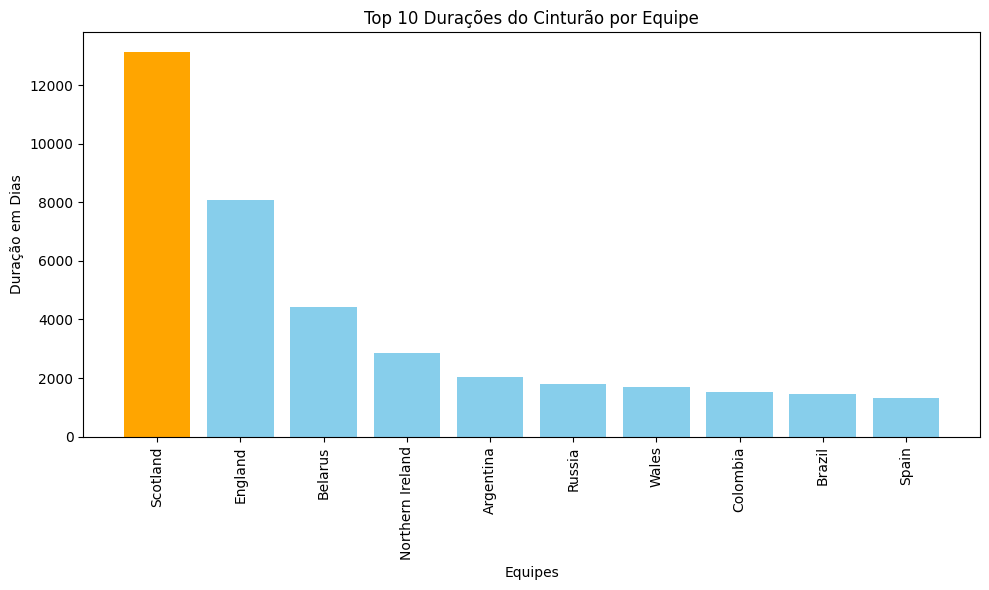

In [39]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_10_cinturao.index, top_10_cinturao.values, color='skyblue')
plt.xlabel('Equipes')
plt.ylabel('Duração em Dias')
plt.title('Top 10 Durações do Cinturão por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

# Destacar a equipe que deteve o cinturão por mais tempo
plt.bar(equipe_mais_tempo, duracao_mais_tempo, color='orange')

# Mostrar o gráfico
plt.show()

Agora, o top 10 dos países que menos tempo detiveram o cinturão

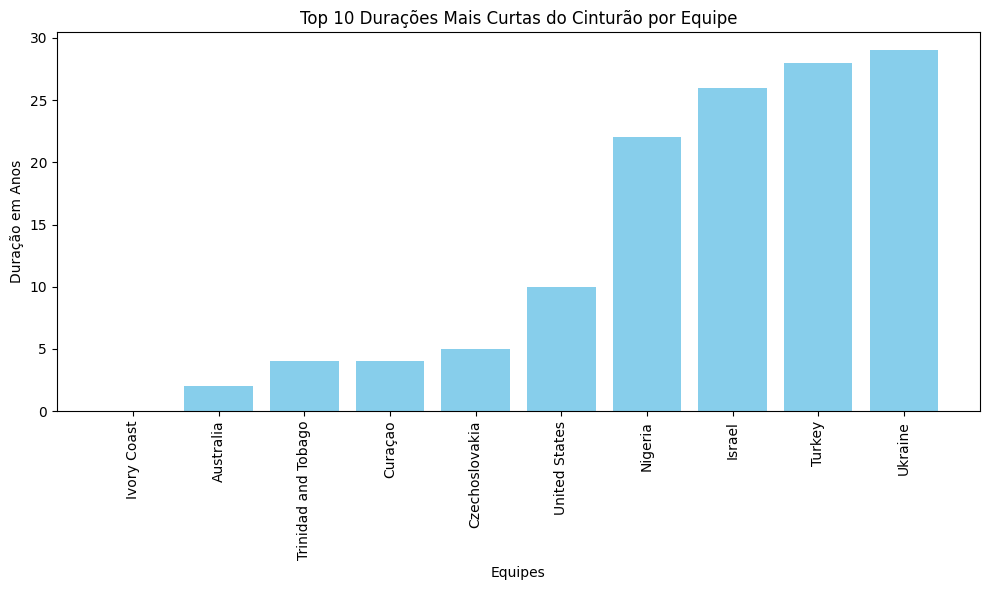

In [40]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_cinturao.index, bottom_10_cinturao.values, color='skyblue')
plt.xlabel('Equipes')
plt.ylabel('Duração em Anos')
plt.title('Top 10 Durações Mais Curtas do Cinturão por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Nesta parte exibe-se as últimas trocas de cinturão. Como a Costa do Marfim, atual detentora não jogou novamente, o jogo exibido é o subsequente a partida da Costa do Marfim no dataframe.

In [41]:
# Identificar as partidas onde houve a troca do cinturão
trocas_cinturao = df[df['cinturao'] != df['cinturao'].shift(-1)]

# Exibir as últimas 10 partidas onde houve a troca do cinturão
ultimas_trocas = trocas_cinturao.tail(10)

# Exibir as últimas 10 trocas de cinturão
print(ultimas_trocas[['date', 'home_team', 'away_team', 'home_score' ,'away_score','cinturao']])

            date    home_team away_team  home_score  away_score     cinturao
43093 2020-11-11       Poland   Ukraine           2           0      Ukraine
43172 2020-11-15        Italy    Poland           2           0       Poland
43994 2021-10-06        Italy     Spain           1           2        Italy
44064 2021-10-10        Spain    France           1           2        Spain
44714 2022-06-03       France   Denmark           1           2       France
44861 2022-06-10      Denmark   Croatia           0           1      Denmark
45299 2022-12-13    Argentina   Croatia           3           0      Croatia
46201 2023-11-16    Argentina   Uruguay           0           2    Argentina
46644 2024-03-26  Ivory Coast   Uruguay           2           1      Uruguay
46672 2024-03-26      Finland   Estonia           2           1  Ivory Coast
